#### 데이터 분석 과제따릉이 탐색적 데이터 분석 복습 체크리스트새로운 주피터노트북을 만든다. 목차를 만든다. 데이터 탐색 섹션부터는 값 출력 - 시각화 - 해석 순으로 진행한다. 분석 아이디어를 얻고 결과를 해석하는데 ChatGPT와 협업한다. (프롬프트 예시 제공 예정)


# [이슈 해결] Konlpy 설치 오류[문제 상황]Java 25를 설치 후, 환경변수 등록함.Jpype1==1.6.0과 konlpy==0.6.0을 설치함 정상적으로 실행 되었던 윈도우 환경과 동일하게 적용해봤으나 실패(Java 24 , Jpype1==1.6.0)[결론]Java 25버전과 상관없이 Jpype1 라이브러리의 문제Jpype1의 버전을 이전으로 다운그레이드하면 작동됩니다. uv add Jpype1==1.5.2 도 가능함을 확인 설치가 잘 안되는 경우에는 가상환경을 다시 구성해보세요.[해결 방법]## 김종우님 해결 방법()uv pip show konlpy jpype1
uv pip uninstall jpype1
uv add jpype1==1.4.1
uv add --upgrade konlpy[추가 정보]## 가상환경에 기존에 설치한 라이브러리 삭제하기uv remove 라이브러리## 가상환경에 특정 버전의 라이브러리 설치하기uv add 라이브러리==1.2.0

# 환경 설정

In [17]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

# 1. 데이터 불러오기

In [45]:
df = pd.read_csv("./data/eda_example_ecommerce_orders.csv")
df.head()

,주문일자,상품_카테고리,구매채널,회원등급,주문금액(원),할인금액(원),구매수량,배송소요일,재구매여부
0,2024-03-01,식품,웹,일반,100276.0,4329.0,3,3.4,N
1,2024-03-02,식품,모바일앱,골드,43956.0,536.0,4,3.9,Y
2,2024-03-03,의류,웹,일반,56720.0,1413.0,1,0.7,N
3,2024-03-04,식품,모바일앱,일반,111861.0,8069.0,2,2.7,N
4,2024-03-05,식품,웹,실버,80148.0,3722.0,1,1.8,N


# 2. 데이터 전처리

## 2-1 데이터 정보 확인하기

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문일자     300 non-null    object 
 1   상품_카테고리  300 non-null    object 
 2   구매채널     300 non-null    object 
 3   회원등급     300 non-null    object 
 4   주문금액(원)  300 non-null    float64
 5   할인금액(원)  290 non-null    float64
 6   구매수량     300 non-null    int64  
 7   배송소요일    288 non-null    float64
 8   재구매여부    300 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 21.2+ KB


In [47]:
df.describe()

,주문금액(원),할인금액(원),구매수량,배송소요일
count,300.000000,290.000000,300.000000,288.000000
mean,56179.726667,6120.627586,2.253333,2.925000
std,45230.363811,3728.121578,1.299275,1.473269
min,5000.000000,0.000000,1.000000,0.500000
25%,34911.750000,3290.750000,1.000000,1.900000
50%,53359.000000,6343.000000,2.000000,2.850000
75%,69197.500000,8706.750000,3.000000,3.900000
max,510000.000000,15090.000000,6.000000,7.800000


## 2-2 데이터 형변환 및 결측치 파악 처리

In [48]:
df.isnull().sum()

주문일자        0
상품_카테고리     0
구매채널        0
회원등급        0
주문금액(원)     0
할인금액(원)    10
구매수량        0
배송소요일      12
재구매여부       0
dtype: int64

### 결측치 제거

In [52]:
df["할인금액(원)"] = df["할인금액(원)"].fillna(0)
df["배송소요일"] = df["배송소요일"].fillna(df["배송소요일"].median())
df.isnull().sum()

주문일자       0
상품_카테고리    0
구매채널       0
회원등급       0
주문금액(원)    0
할인금액(원)    0
구매수량       0
배송소요일      0
재구매여부      0
dtype: int64

## 2-4 이상치 파악 및 처리

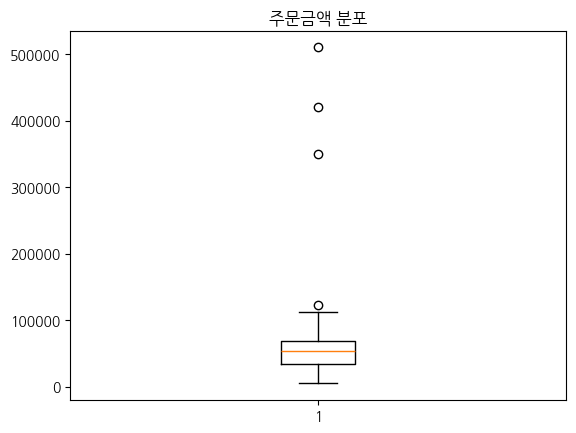

In [54]:
plt.boxplot(df["주문금액(원)"])
plt.title("주문금액 분포")
plt.show()

In [64]:
# IQR 기준 이상치 확인
q1 = df["주문금액(원)"].quantile(0.25)
q3 = df["주문금액(원)"].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + (1.5*iqr)

# 이상금액인지 판단, 분석에 넣을건지 판단
print(upper_bound)
print(df[df["주문금액(원)"] > upper_bound])

120626.125
           주문일자 상품_카테고리  구매채널 회원등급   주문금액(원)  할인금액(원)  구매수량  배송소요일 재구매여부
115  2024-06-24      의류  모바일앱   일반  350000.0   2604.0     4    3.1     N
160  2024-08-08      의류  오프라인   일반  420000.0   3831.0     3    0.5     N
189  2024-09-06      식품  모바일앱   일반  510000.0  15090.0     2    3.2     N
287  2024-12-13      식품     웹   일반  123335.0   8178.0     3    2.3     Y


## 2-5 파생 변수 생성

In [67]:
# 실 결제금액
df["실결제금액(원)"] = df["주문금액(원)"] - df["할인금액(원)"]

# 개당 단가
df["상품단가(원)"] = df["주문금액(원)"] / df["구매수량"]

df.head()

,주문일자,상품_카테고리,구매채널,회원등급,주문금액(원),할인금액(원),구매수량,배송소요일,재구매여부,실결제금액(원),상품단가(원)
0,2024-03-01,식품,웹,일반,100276.0,4329.0,3,3.4,N,95947.0,33425.333333
1,2024-03-02,식품,모바일앱,골드,43956.0,536.0,4,3.9,Y,43420.0,10989.000000
2,2024-03-03,의류,웹,일반,56720.0,1413.0,1,0.7,N,55307.0,56720.000000
3,2024-03-04,식품,모바일앱,일반,111861.0,8069.0,2,2.7,N,103792.0,55930.500000
4,2024-03-05,식품,웹,실버,80148.0,3722.0,1,1.8,N,76426.0,80148.000000


## 2-6 데이터 저장

In [69]:
df.to_csv(
    "./data/eda_example_ecommerce_orders_분석.csv",
    index=False
)

In [70]:
df2 = pd.read_csv("./data/eda_example_ecommerce_orders_분석.csv")

# 3. 데이터 탐색하기

## 3-1 컬럼 탐색하기

### 1) 주문금액 분포

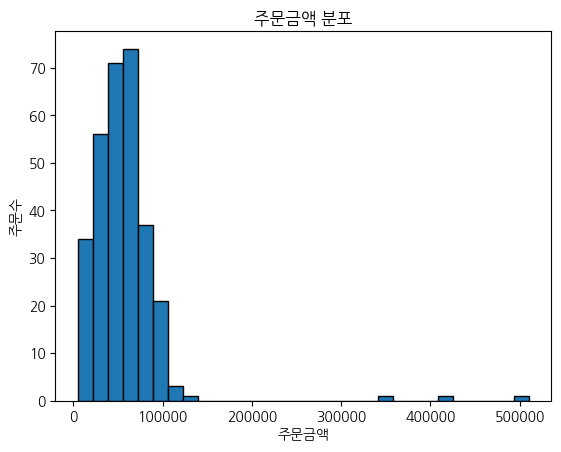

In [72]:
plt.hist(df2["주문금액(원)"],bins=30,edgecolor="black")
plt.title("주문금액 분포")
plt.xlabel("주문금액")
plt.ylabel("주문수")
plt.show()

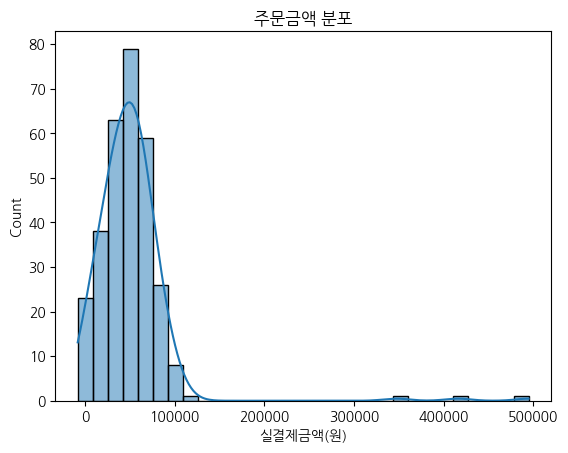

In [75]:
sns.histplot(df2["실결제금액(원)"],bins=30,kde=True)
plt.title("주문금액 분포")
plt.show()

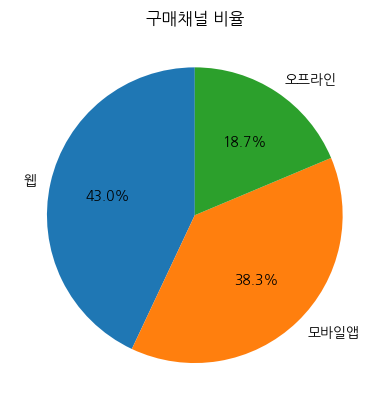

In [86]:
ch_cnt = df2["구매채널"].value_counts()
#print(ch_cnt)
plt.pie(
    ch_cnt,
    labels = ch_cnt.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("구매채널 비율")
plt.show()

## 3-2 그룹별 탐색하기

### 1) groupby 로 숫자 요약 후 시각화 : 상품 카테고리별 평균 주문금액 

상품_카테고리
뷰티      1110131.0
생활용품    3975390.0
식품      5254769.0
의류      3242629.0
전자기기    3270999.0
Name: 주문금액(원), dtype: float64


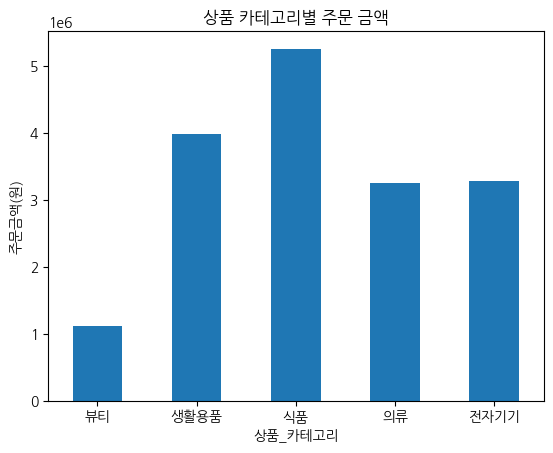

In [90]:
cate_sum = df2.groupby("상품_카테고리")["주문금액(원)"].sum()
print(cate_sum)

cate_sum.plot(kind="bar")
plt.title("상품 카테고리별 주문 금액")
plt.ylabel("주문금액(원)")
plt.xticks(rotation=0)
plt.show()

#### 생활용품과 식품 카테고리의 소비가 많음

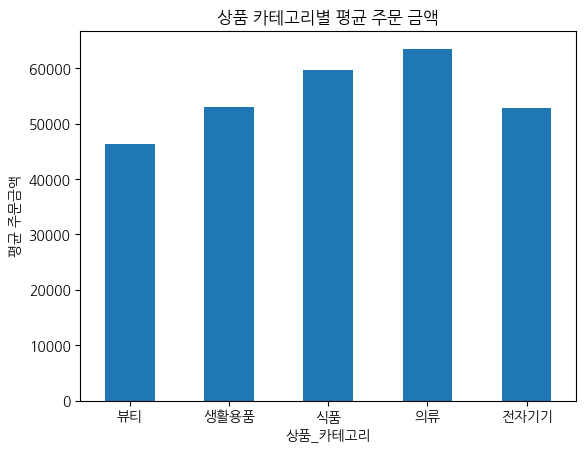

In [91]:
cate_mean = df2.groupby("상품_카테고리")["주문금액(원)"].mean()

cate_mean.plot(kind="bar")
plt.title("상품 카테고리별 평균 주문 금액")
plt.ylabel("평균 주문금액")
plt.xticks(rotation=0)
plt.show()

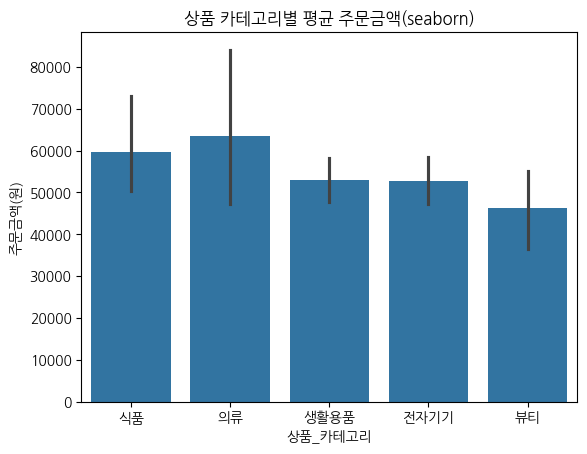

In [92]:
sns.barplot(
    data=df2,
    x="상품_카테고리",
    y="주문금액(원)",
    estimator=np.mean
)
plt.title("상품 카테고리별 평균 주문금액(seaborn)")
plt.show()

In [93]:
pivot_tb = df2.pivot_table(
    values="주문금액(원)",
    index="회원등급",
    columns="구매채널",
    aggfunc="mean"
)

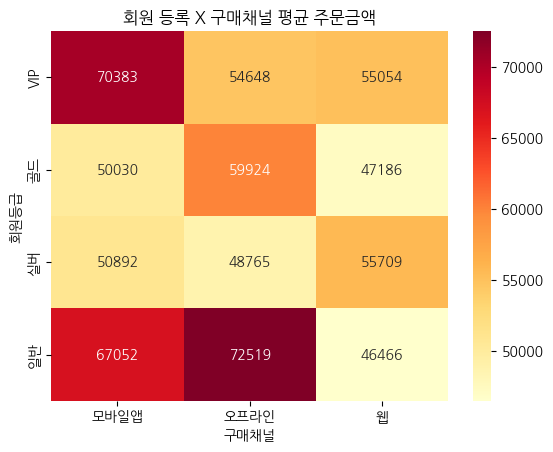

In [95]:
sns.heatmap(
    pivot_tb,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("회원 등록 X 구매채널 평균 주문금액")
plt.show()

'''
[내 정보]
나는 파이썬을 처음 다뤄봐.
내 목표는 데이터 분석을 하는데 내가 관련 정보를 찾아서 직접 코드를 작성하는거야. 

[역할 및 목표]
너는 파이썬을 잘 활용할 줄 아는 데이터 분석가야. 
내가 데이터 정보와 결과를 주면 데이터 분석 과정에 맞게 
1. 내 수준에 맞게 결과를 해석하고, 
2. 새롭게 분석할 데이터 아이디어와 의도를 설명하고,
3. 내가 스스로 그 문제를 해결할 수 있게 파이썬 힌트를 주면 돼. 

내가 데이터 분석을 이해하고 수행할 수 있게 도와주는게 네 목표야.

[주의사항]
내가 물어보기 전까지는 전체 코드를 제공하지마. 

[데이터 분석 과정]
1. 데이터 불러오기
2. 데이터 전처리
    1) 데이터 정보 확인하기 
    2) 데이터 형 변환
    3) 결측치 확인 및 처리
    4) 이상치 확인 및 처리
    5) 파생변수 생성
3. 데이터 탐색 
    1) 변수별 특징 파악하기
    2) 그룹별 특징 파악하기
    3) 변수 간 관계 파악하기
    '''